# Feature importance

In [6]:
import pandas as pd
import sys
import os

# Add the src directory to the path so we can import our modules
sys.path.append(os.path.abspath('..'))

# Import the utility function for one-time directory change
from src.utilities.path_utilities import ensure_parent_dir

# Change to parent directory (only happens once even if cell is re-executed)
ensure_parent_dir('notebook_setup')

Directory already changed to: /Users/adrianhajdukiewicz/projects/private/2025_data_biz_hackathon


'/Users/adrianhajdukiewicz/projects/private/2025_data_biz_hackathon'

In [7]:
df = pd.read_csv("data/y_and_x_ready_for_training.csv")

Found observation with key '-5874.0_3134.0':
Test set position: 1329
Actual target: 2.0
10th percentile prediction: -0.5394
30th percentile prediction: 0.6425
70th percentile prediction: 2.7023

Generating LIME explanations for observation '-5874.0_3134.0'...

LIME Explanation for Observation: -5874.0_3134.0

10th Percentile Model Explanation:
Prediction: -0.5394
Feature contributions:
  Unnamed: 0 <= 8743.75: -0.8459 ↓
  water_tower <= 0.00: -0.2351 ↓
  zoo <= 0.00: +0.2243 ↑
  nursing_home <= 0.00: +0.2222 ↑
  water_mill <= 0.00: -0.2191 ↓
  recycling_glass <= 0.00: +0.2127 ↑
  recycling_paper <= 0.00: +0.2093 ↑
  biergarten <= 0.00: +0.2059 ↑
  outdoor_shop <= 0.00: -0.2056 ↓
  toy_shop <= 0.00: +0.2025 ↑
  public_building <= 0.00: +0.1873 ↑
  general <= 0.00: +0.1795 ↑
  observation_tower <= 0.00: +0.1766 ↑
  shoe_shop <= 0.00: +0.1766 ↑
  picnic_site <= 0.00: +0.1592 ↑
  gift_shop <= 0.00: -0.1531 ↓
  chalet <= 0.00: +0.1301 ↑
  stationery <= 0.00: +0.1237 ↑
  newsagent > 0.00: -0

/Users/adrianhajdukiewicz/projects/private/2025_data_biz_hackathon/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileRegressor was fitted with feature names
  warnings.warn(
/Users/adrianhajdukiewicz/projects/private/2025_data_biz_hackathon/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileRegressor was fitted with feature names
  warnings.warn(
/Users/adrianhajdukiewicz/projects/private/2025_data_biz_hackathon/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileRegressor was fitted with feature names
  warnings.warn(


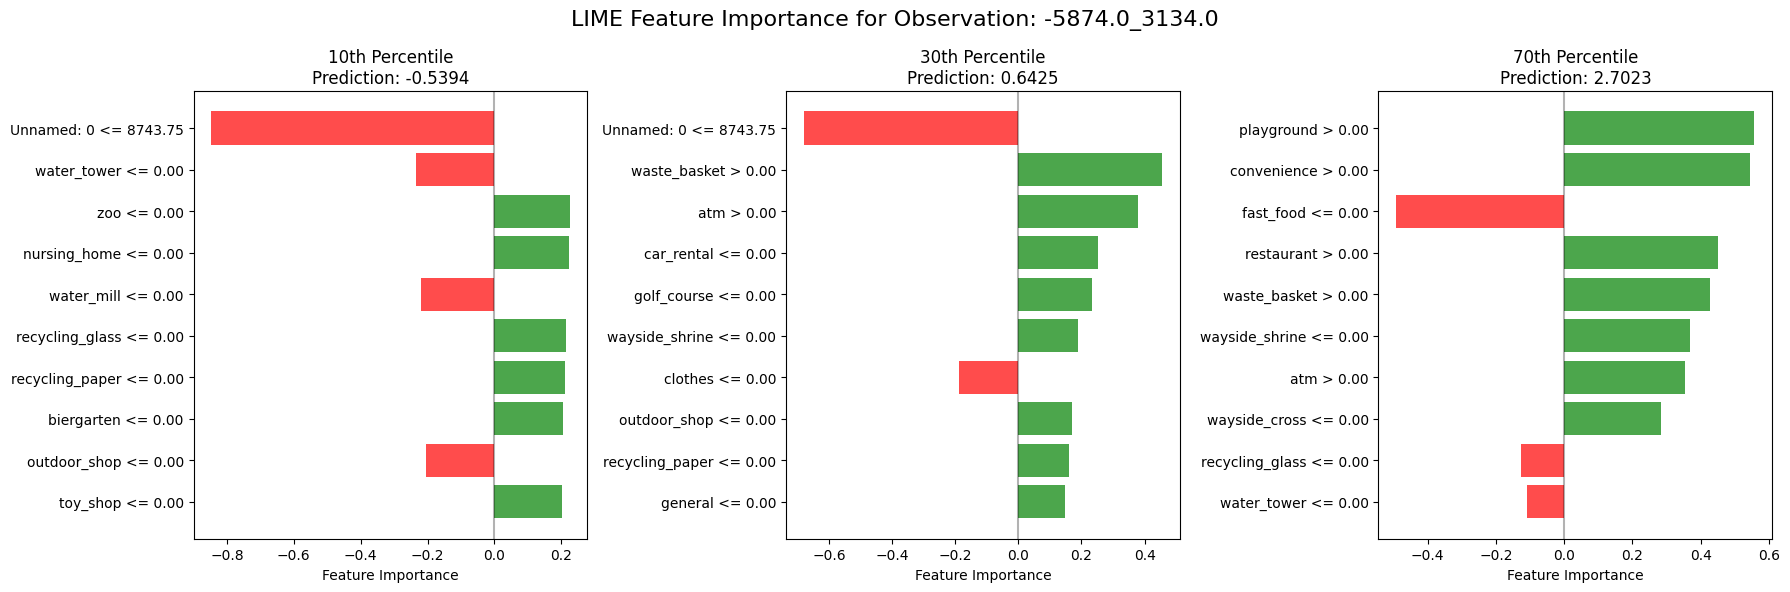


SUMMARY INSIGHTS FOR OBSERVATION: -5874.0_3134.0
Actual target value: 2.0000
Prediction range: -0.5394 to 2.7023
Prediction interval width: 3.2417

Most consistently important features across all models:
  Unnamed: 0 <= 8743.75: 0.5121
  waste_basket > 0.00: 0.3224
  atm > 0.00: 0.2486
  convenience > 0.00: 0.2217
  playground > 0.00: 0.2008


In [10]:
# new

# Find the specific observation with key '-5874.0_3134.0'
target_key = '-5874.0_3134.0'

# First, check if this key exists in your test set
target_observation = results_df[results_df['key'] == target_key]

if target_observation.empty:
    print(f"Key '{target_key}' not found in test set.")
    # If not in test set, check if it's in the original dataframe
    if target_key in key_column.values:
        print(f"Key '{target_key}' found in original dataset but not in test set.")
        # Get the observation from the original dataset
        original_idx = df[df['key'] == target_key].index[0]
        observation_features = df_features.iloc[original_idx:original_idx+1]
        actual_target = target.iloc[original_idx]
        print(f"Actual target value: {actual_target}")
    else:
        print(f"Key '{target_key}' not found in dataset.")
        exit()
else:
    # Get the test set index for this observation
    test_idx = target_observation.index[0]
    # Find the corresponding index in X_test
    test_position = list(X_test.index).index(test_idx)
    observation_features = X_test.iloc[test_position:test_position+1]
    actual_target = target_observation['actual_target'].iloc[0]
    
    print(f"Found observation with key '{target_key}':")
    print(f"Test set position: {test_position}")
    print(f"Actual target: {actual_target}")
    print(f"10th percentile prediction: {target_observation['prediction_10th_percentile'].iloc[0]:.4f}")
    print(f"30th percentile prediction: {target_observation['prediction_30th_percentile'].iloc[0]:.4f}")
    print(f"70th percentile prediction: {target_observation['prediction_70th_percentile'].iloc[0]:.4f}")

# Create LIME explainer (if not already created)
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    mode='regression',
    training_labels=y_train.values,
    verbose=False
)

# Get LIME explanations for this specific observation
print(f"\nGenerating LIME explanations for observation '{target_key}'...")

# Explain for all three models
explanation_10th = explainer.explain_instance(
    observation_features.values[0], 
    model_10th.predict, 
    num_features=len(X_train.columns)
)

explanation_30th = explainer.explain_instance(
    observation_features.values[0], 
    model_30th.predict, 
    num_features=len(X_train.columns)
)

explanation_70th = explainer.explain_instance(
    observation_features.values[0], 
    model_70th.predict, 
    num_features=len(X_train.columns)
)

# Display detailed explanations
print(f"\n{'='*60}")
print(f"LIME Explanation for Observation: {target_key}")
print(f"{'='*60}")

print(f"\n10th Percentile Model Explanation:")
print(f"Prediction: {explanation_10th.predicted_value:.4f}")
print("Feature contributions:")
for feature, importance in explanation_10th.as_list():
    direction = "↑" if importance > 0 else "↓" if importance < 0 else "→"
    print(f"  {feature}: {importance:+.4f} {direction}")

print(f"\n30th Percentile Model Explanation:")
print(f"Prediction: {explanation_30th.predicted_value:.4f}")
print("Feature contributions:")
for feature, importance in explanation_30th.as_list():
    direction = "↑" if importance > 0 else "↓" if importance < 0 else "→"
    print(f"  {feature}: {importance:+.4f} {direction}")

print(f"\n70th Percentile Model Explanation:")
print(f"Prediction: {explanation_70th.predicted_value:.4f}")
print("Feature contributions:")
for feature, importance in explanation_70th.as_list():
    direction = "↑" if importance > 0 else "↓" if importance < 0 else "→"
    print(f"  {feature}: {importance:+.4f} {direction}")

# Show the actual feature values for this observation
print(f"\nActual Feature Values for Observation '{target_key}':")
for feature in observation_features.columns:
    value = observation_features[feature].iloc[0]
    print(f"  {feature}: {value}")

# Compare feature importance across models
print(f"\nFeature Importance Comparison Across Models:")
print(f"{'Feature':<30} {'10th %':<12} {'30th %':<12} {'70th %':<12}")
print("-" * 66)

all_features = set()
for exp in [explanation_10th, explanation_30th, explanation_70th]:
    all_features.update([f for f, _ in exp.as_list()])

importance_10th = dict(explanation_10th.as_list())
importance_30th = dict(explanation_30th.as_list())
importance_70th = dict(explanation_70th.as_list())

# Sort by average absolute importance
feature_avg_importance = []
for feature in all_features:
    avg_imp = (abs(importance_10th.get(feature, 0)) + 
               abs(importance_30th.get(feature, 0)) + 
               abs(importance_70th.get(feature, 0))) / 3
    feature_avg_importance.append((feature, avg_imp))

feature_avg_importance.sort(key=lambda x: x[1], reverse=True)

for feature, _ in feature_avg_importance[:15]:  # Show top 15 features
    imp_10th = importance_10th.get(feature, 0)
    imp_30th = importance_30th.get(feature, 0)
    imp_70th = importance_70th.get(feature, 0)
    print(f"{feature:<30} {imp_10th:+.4f}      {imp_30th:+.4f}      {imp_70th:+.4f}")

# Save individual HTML explanations
explanation_10th.save_to_file(f'lime_explanation_10th_{target_key.replace(".", "_")}.html')
explanation_30th.save_to_file(f'lime_explanation_30th_{target_key.replace(".", "_")}.html')
explanation_70th.save_to_file(f'lime_explanation_70th_{target_key.replace(".", "_")}.html')

print(f"\nLIME explanations saved as HTML files:")
print(f"- lime_explanation_10th_{target_key.replace('.', '_')}.html")
print(f"- lime_explanation_30th_{target_key.replace('.', '_')}.html")
print(f"- lime_explanation_70th_{target_key.replace('.', '_')}.html")

# Create visualization for this specific observation
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f'LIME Feature Importance for Observation: {target_key}', fontsize=16)

models = [
    (explanation_10th, "10th Percentile", axes[0]),
    (explanation_30th, "30th Percentile", axes[1]), 
    (explanation_70th, "70th Percentile", axes[2])
]

for explanation, title, ax in models:
    features, importances = zip(*explanation.as_list()[:10])  # Top 10 features
    
    colors = ['green' if imp > 0 else 'red' for imp in importances]
    
    y_pos = np.arange(len(features))
    ax.barh(y_pos, importances, color=colors, alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'{title}\nPrediction: {explanation.predicted_value:.4f}')
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Invert y-axis to show most important at top
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n{'='*60}")
print(f"SUMMARY INSIGHTS FOR OBSERVATION: {target_key}")
print(f"{'='*60}")

print(f"Actual target value: {actual_target:.4f}")
print(f"Prediction range: {explanation_10th.predicted_value:.4f} to {explanation_70th.predicted_value:.4f}")
print(f"Prediction interval width: {explanation_70th.predicted_value - explanation_10th.predicted_value:.4f}")

# Find most consistent important features across models
consistent_features = []
for feature in all_features:
    importances = [
        abs(importance_10th.get(feature, 0)),
        abs(importance_30th.get(feature, 0)), 
        abs(importance_70th.get(feature, 0))
    ]
    if all(imp > 0.01 for imp in importances):  # Feature is important in all models
        avg_importance = sum(importances) / 3
        consistent_features.append((feature, avg_importance))

consistent_features.sort(key=lambda x: x[1], reverse=True)

print(f"\nMost consistently important features across all models:")
for feature, avg_imp in consistent_features[:5]:
    print(f"  {feature}: {avg_imp:.4f}")